In [1]:
import matplotlib.pyplot as plt
import pandas as pd

/Users/qili/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/qili/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [22]:
import matplotlib.dates as mdates

def Scatter_data_comparison(file_path, day):
    # data load
    data = pd.read_csv(file_path)
    data['datetime'] = pd.to_datetime(data['datetime'])
    
    # sample may 4th
    data_may4 = data[data['datetime'].dt.date == pd.to_datetime(day).date()]
    
    # sample morning and evening peek
    data_may4_morning = data_may4[(data_may4['datetime'].dt.hour >= 5) & (data_may4['datetime'].dt.hour < 10)]
    data_may4_evening = data_may4[(data_may4['datetime'].dt.hour >= 14) & (data_may4['datetime'].dt.hour < 19)]
    
    # the whole day of May 4th
    plt.figure(figsize=(35, 16))
    plt.plot(data_may4['datetime'], data_may4['actual'], label='Actual', linewidth=1.5)
    plt.plot(data_may4['datetime'], data_may4['predicted'], label='Predicted', linewidth=1.5)
    plt.title(f"Data Comparison for {day} (Entire Day)", fontsize=35)
    plt.xlabel("Time", fontsize=30)
    plt.ylabel("Value", fontsize=30)
    plt.legend(fontsize=25)
    plt.xticks(rotation=45, fontsize=20)  
    plt.yticks( fontsize=20) 
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    plt.grid(True)
    
    # 5:00-10:00
    plt.figure(figsize=(35, 16))
    plt.scatter(data_may4_morning['datetime'], data_may4_morning['actual'], label='Actual', marker='^')
    plt.scatter(data_may4_morning['datetime'], data_may4_morning['predicted'], label='Predicted', marker='^')
    plt.title(f"Data Comparison for {day} (05:00 to 10:00)", fontsize=35)
    plt.xlabel("Time", fontsize=30)
    plt.ylabel("Value", fontsize=30)
    plt.legend(fontsize=25)
    plt.xticks(rotation=45, fontsize=20) 
    plt.yticks( fontsize=20) 
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    plt.grid(True)
    
    # 14:00-19:00
    plt.figure(figsize=(35, 16))
    plt.scatter(data_may4_evening['datetime'], data_may4_evening['actual'], label='Actual', marker='o')
    plt.scatter(data_may4_evening['datetime'], data_may4_evening['predicted'], label='Predicted', marker='o')
    plt.title(f"Data Comparison for {day} (14:00 to 19:00)", fontsize=35)
    plt.xlabel("Time", fontsize=30)
    plt.ylabel("Value", fontsize=30)
    plt.legend(fontsize=25)
    plt.xticks(rotation=45, fontsize=20) 
    plt.yticks( fontsize=20) 
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()


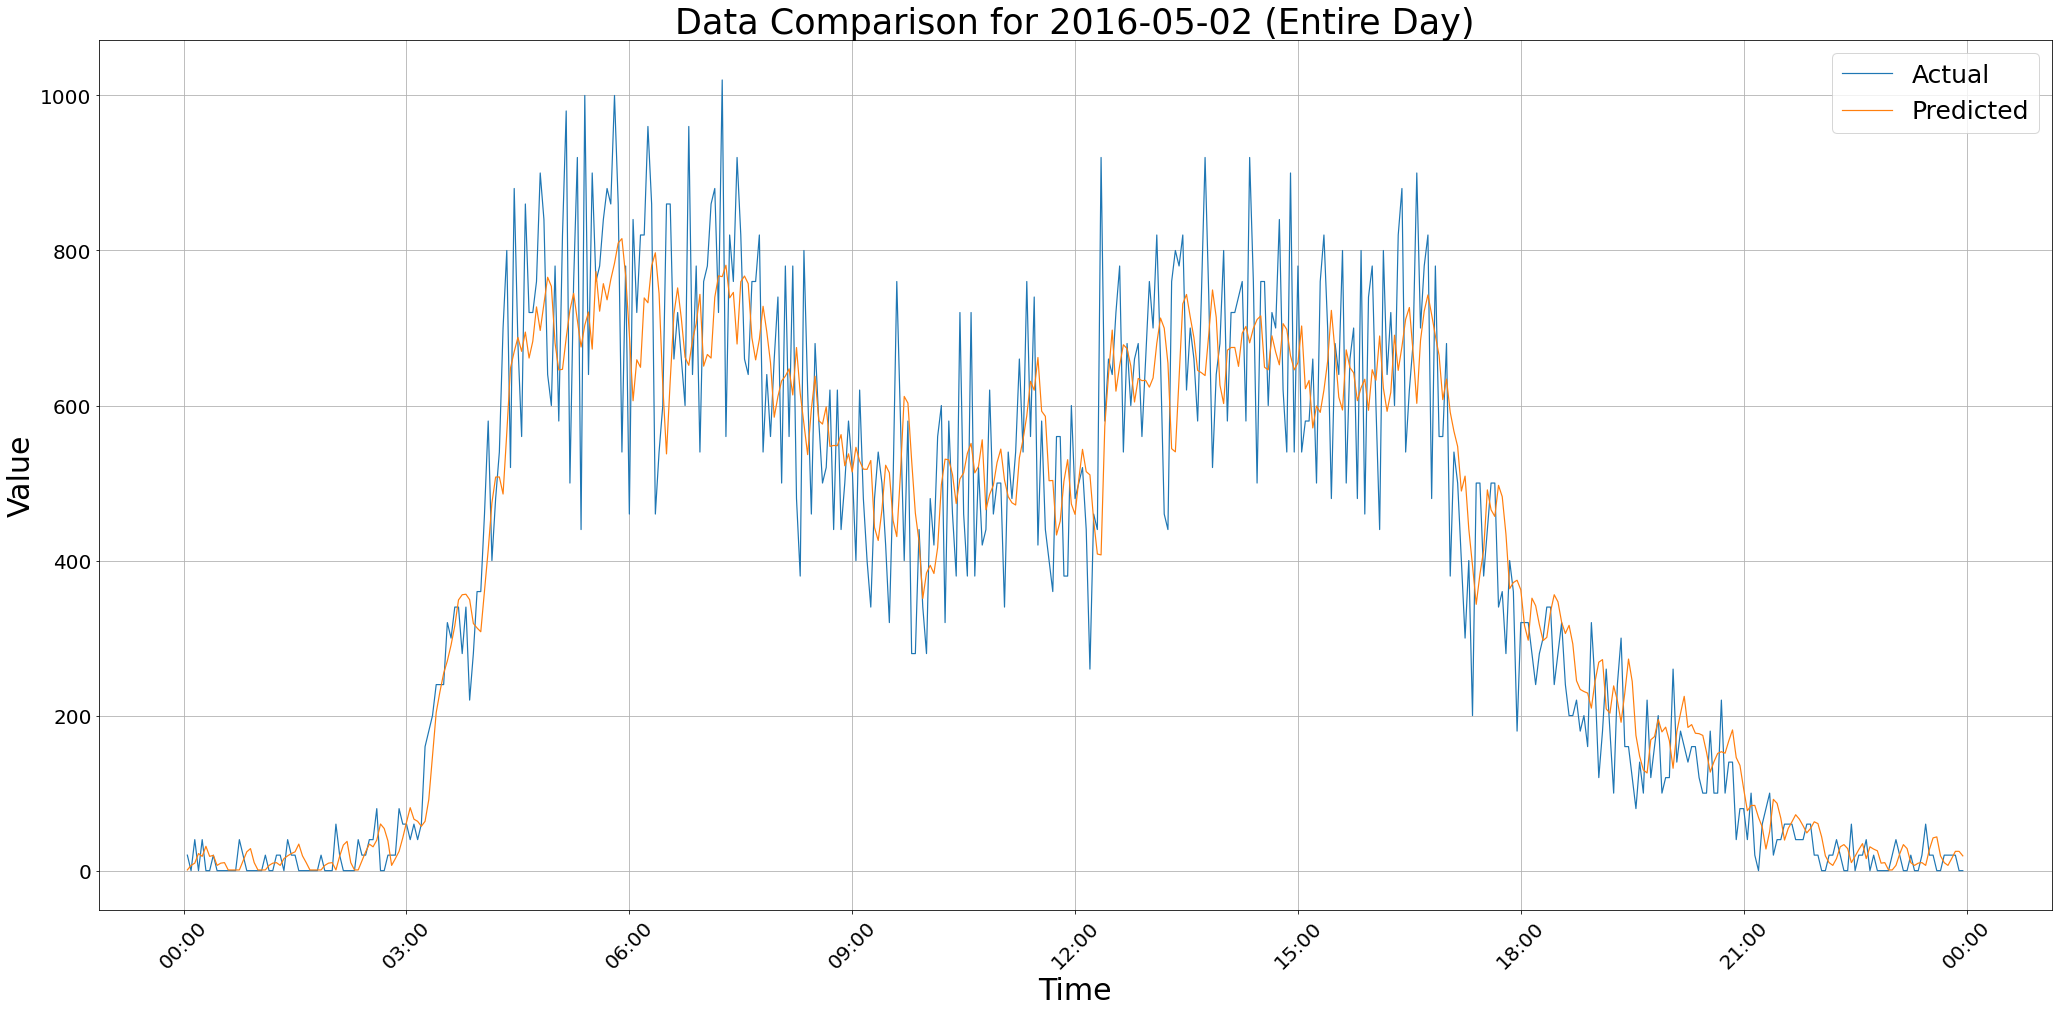

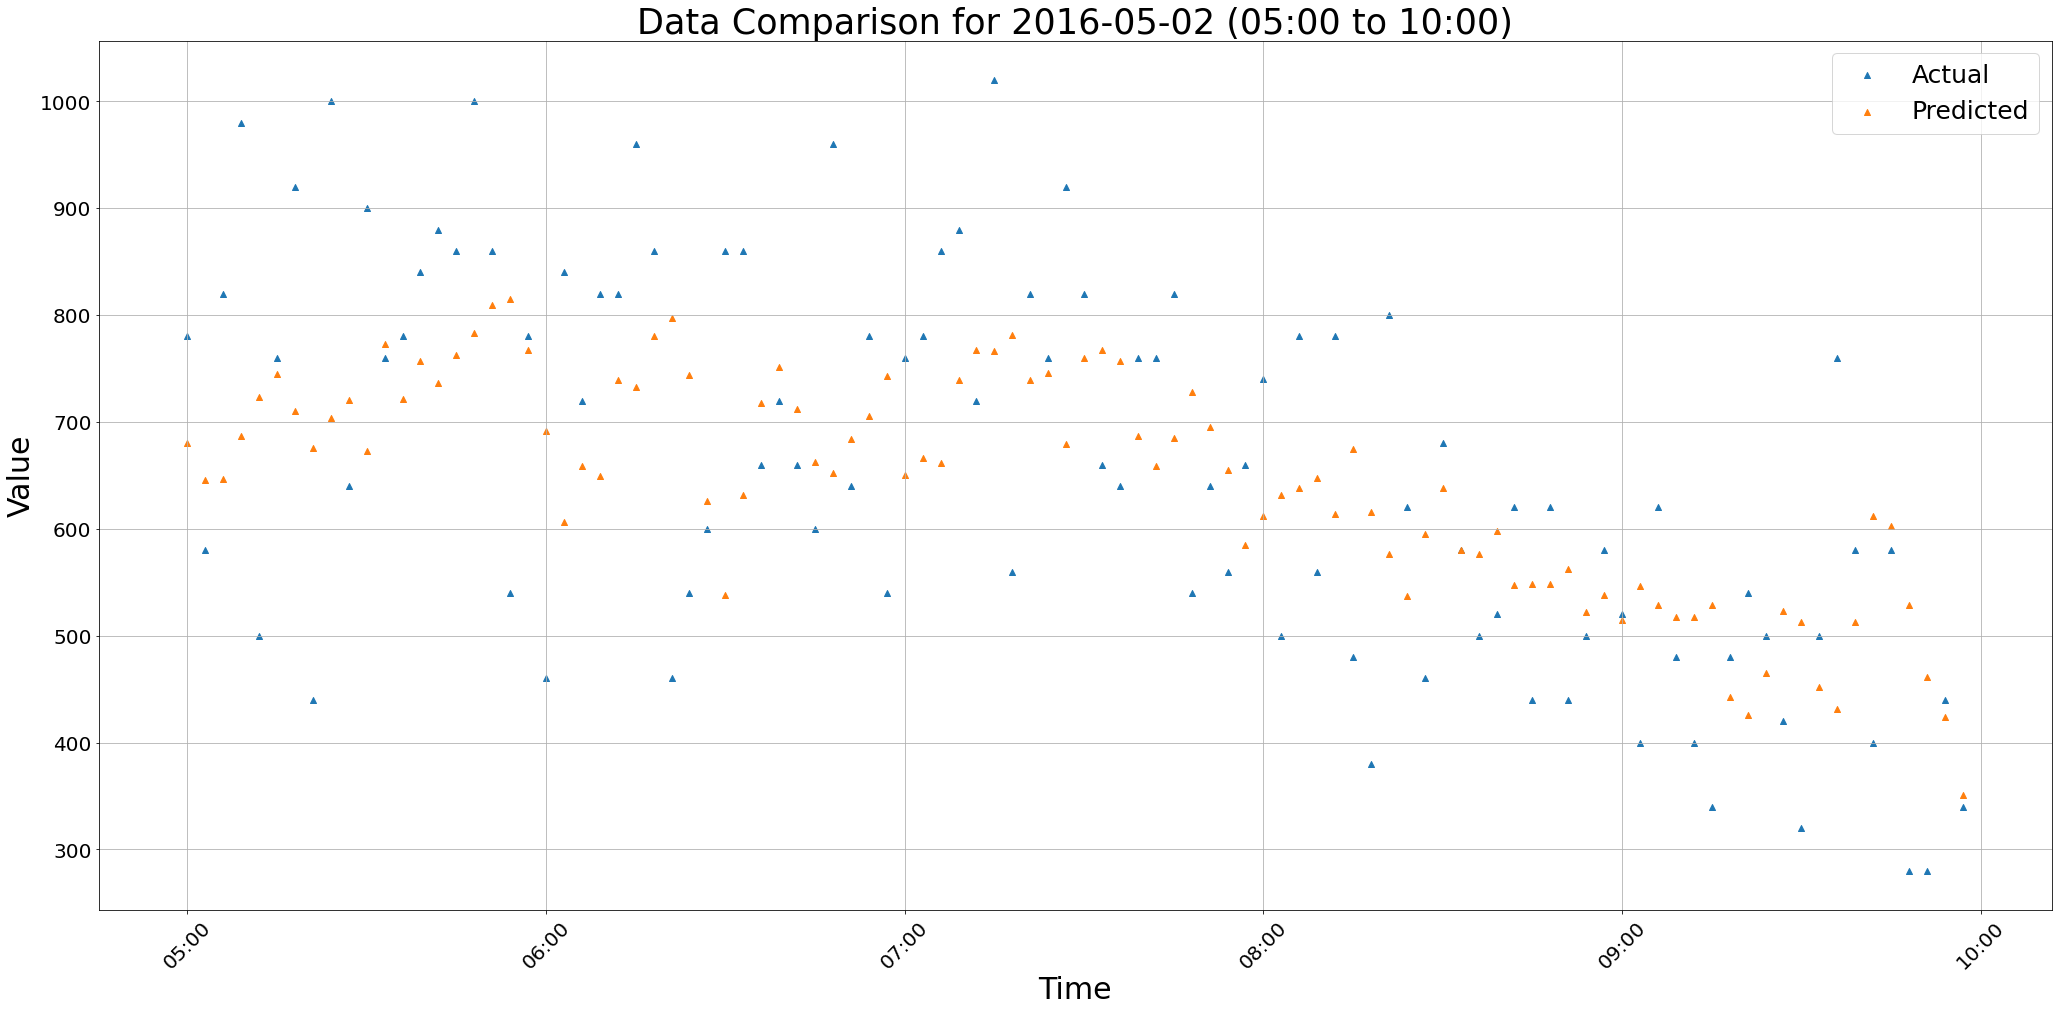

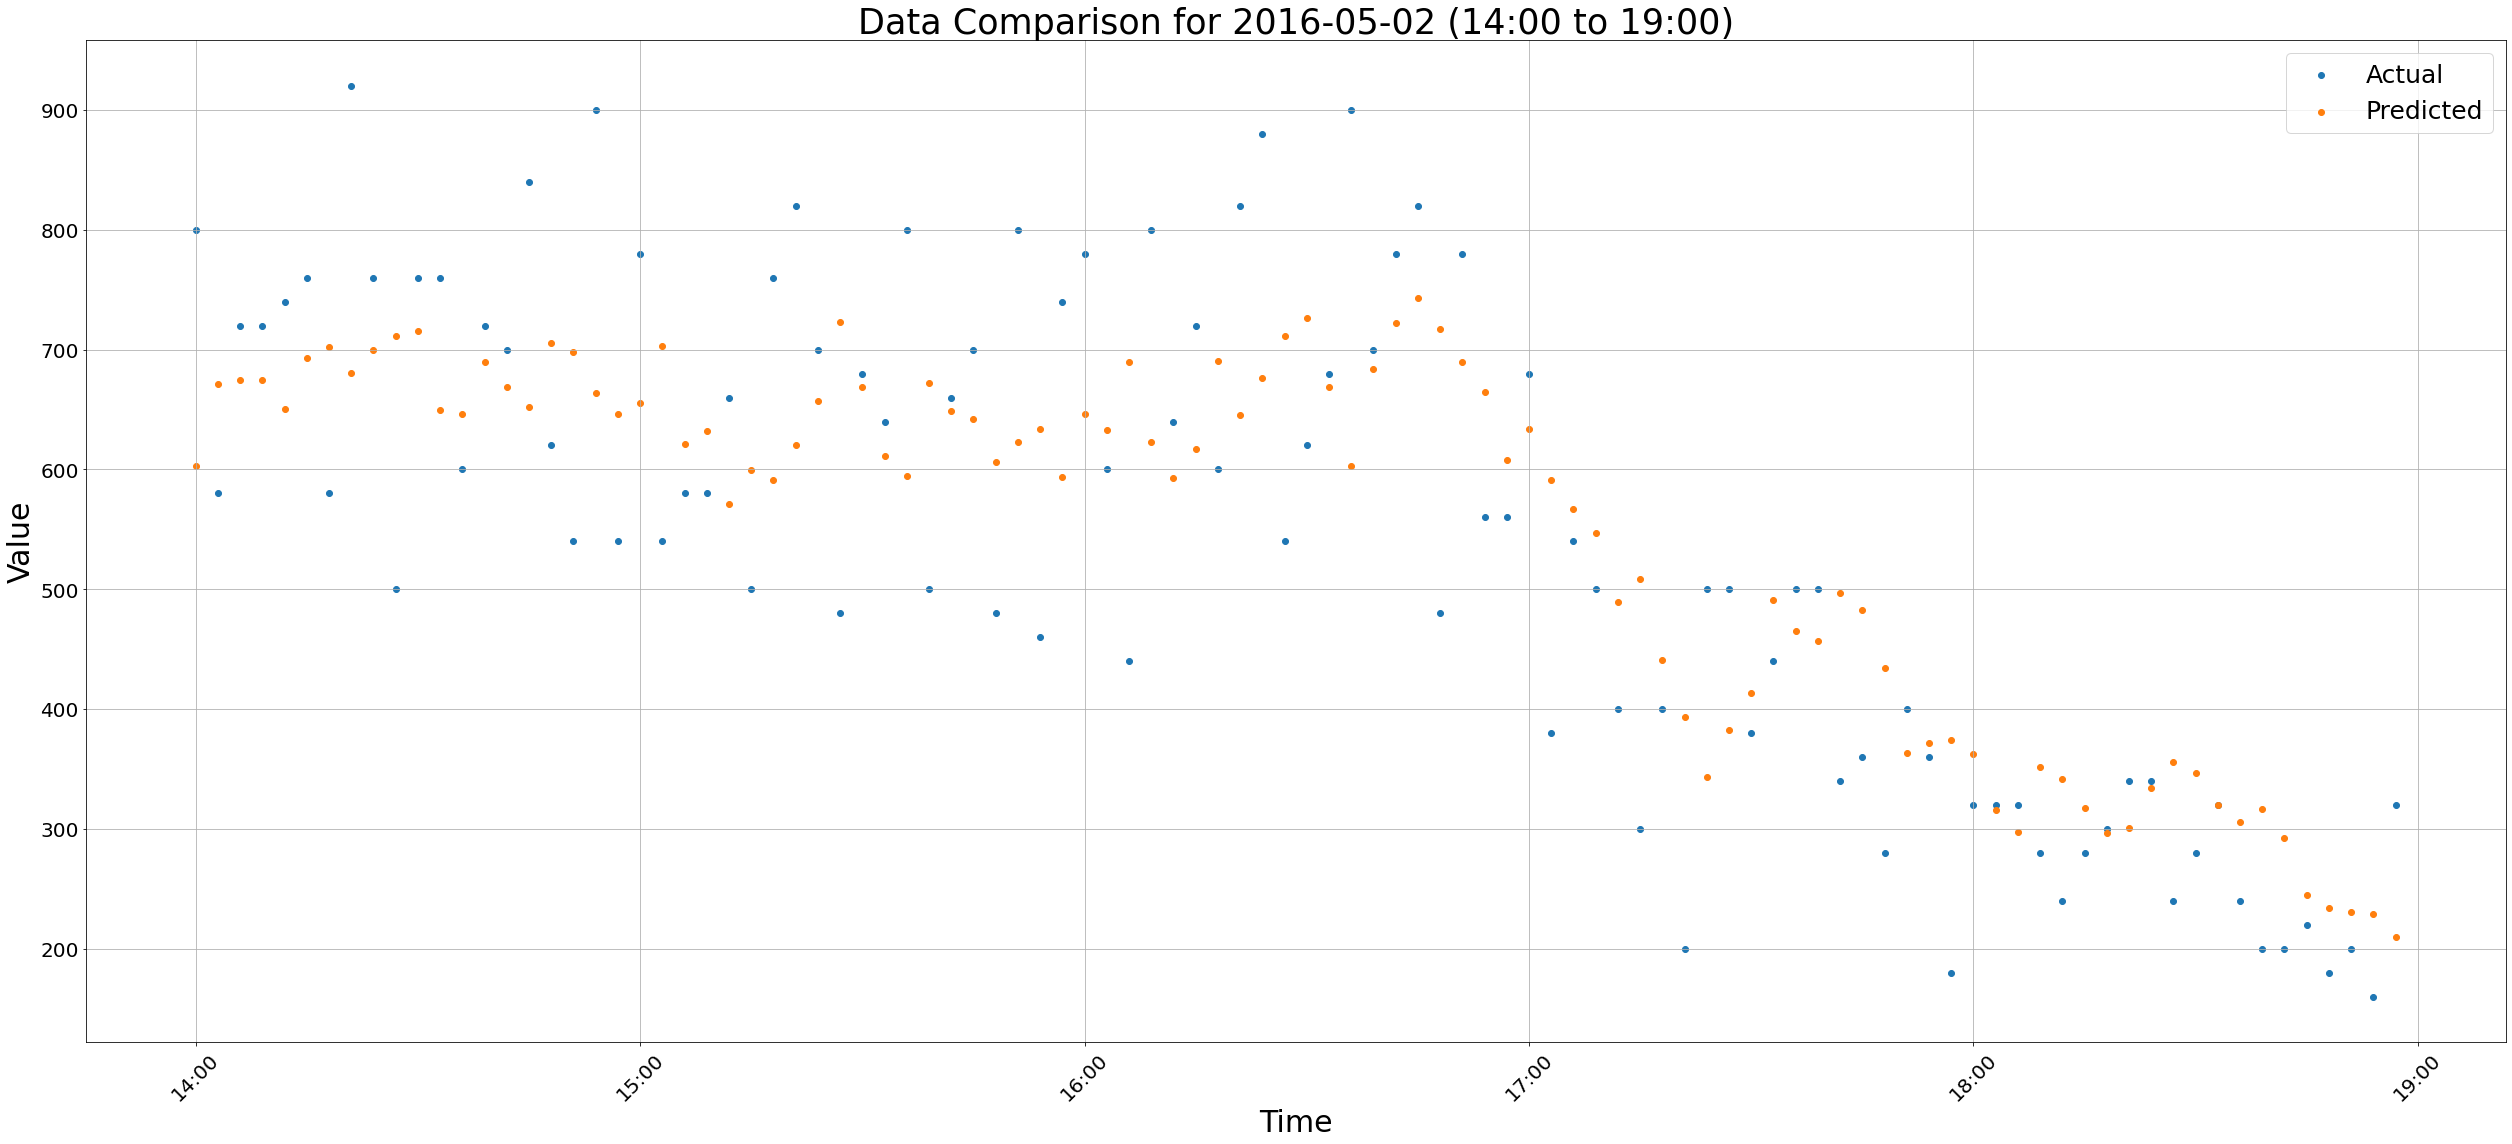

In [23]:
Scatter_data_comparison("Test_Set_Prediction_data/LSTM_Test_Set_Predictions.csv", "2016-05-02")

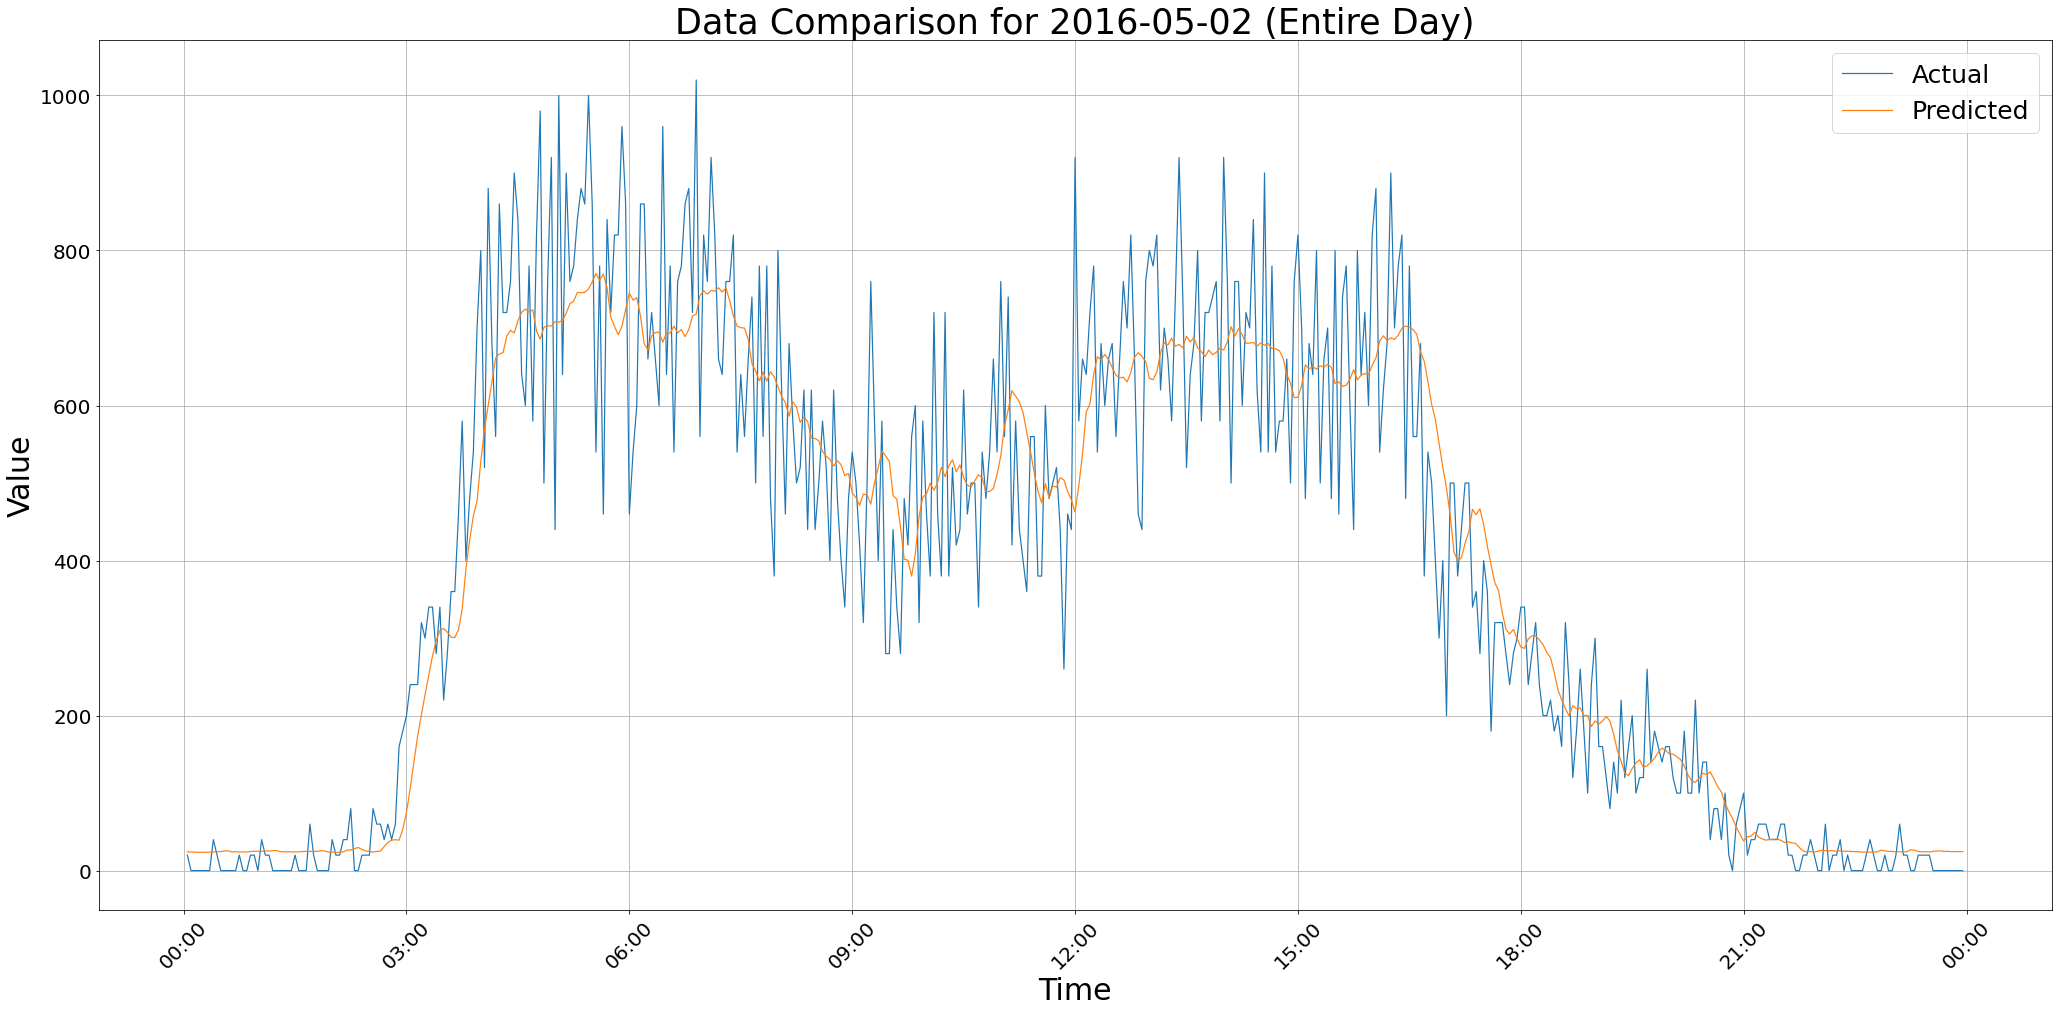

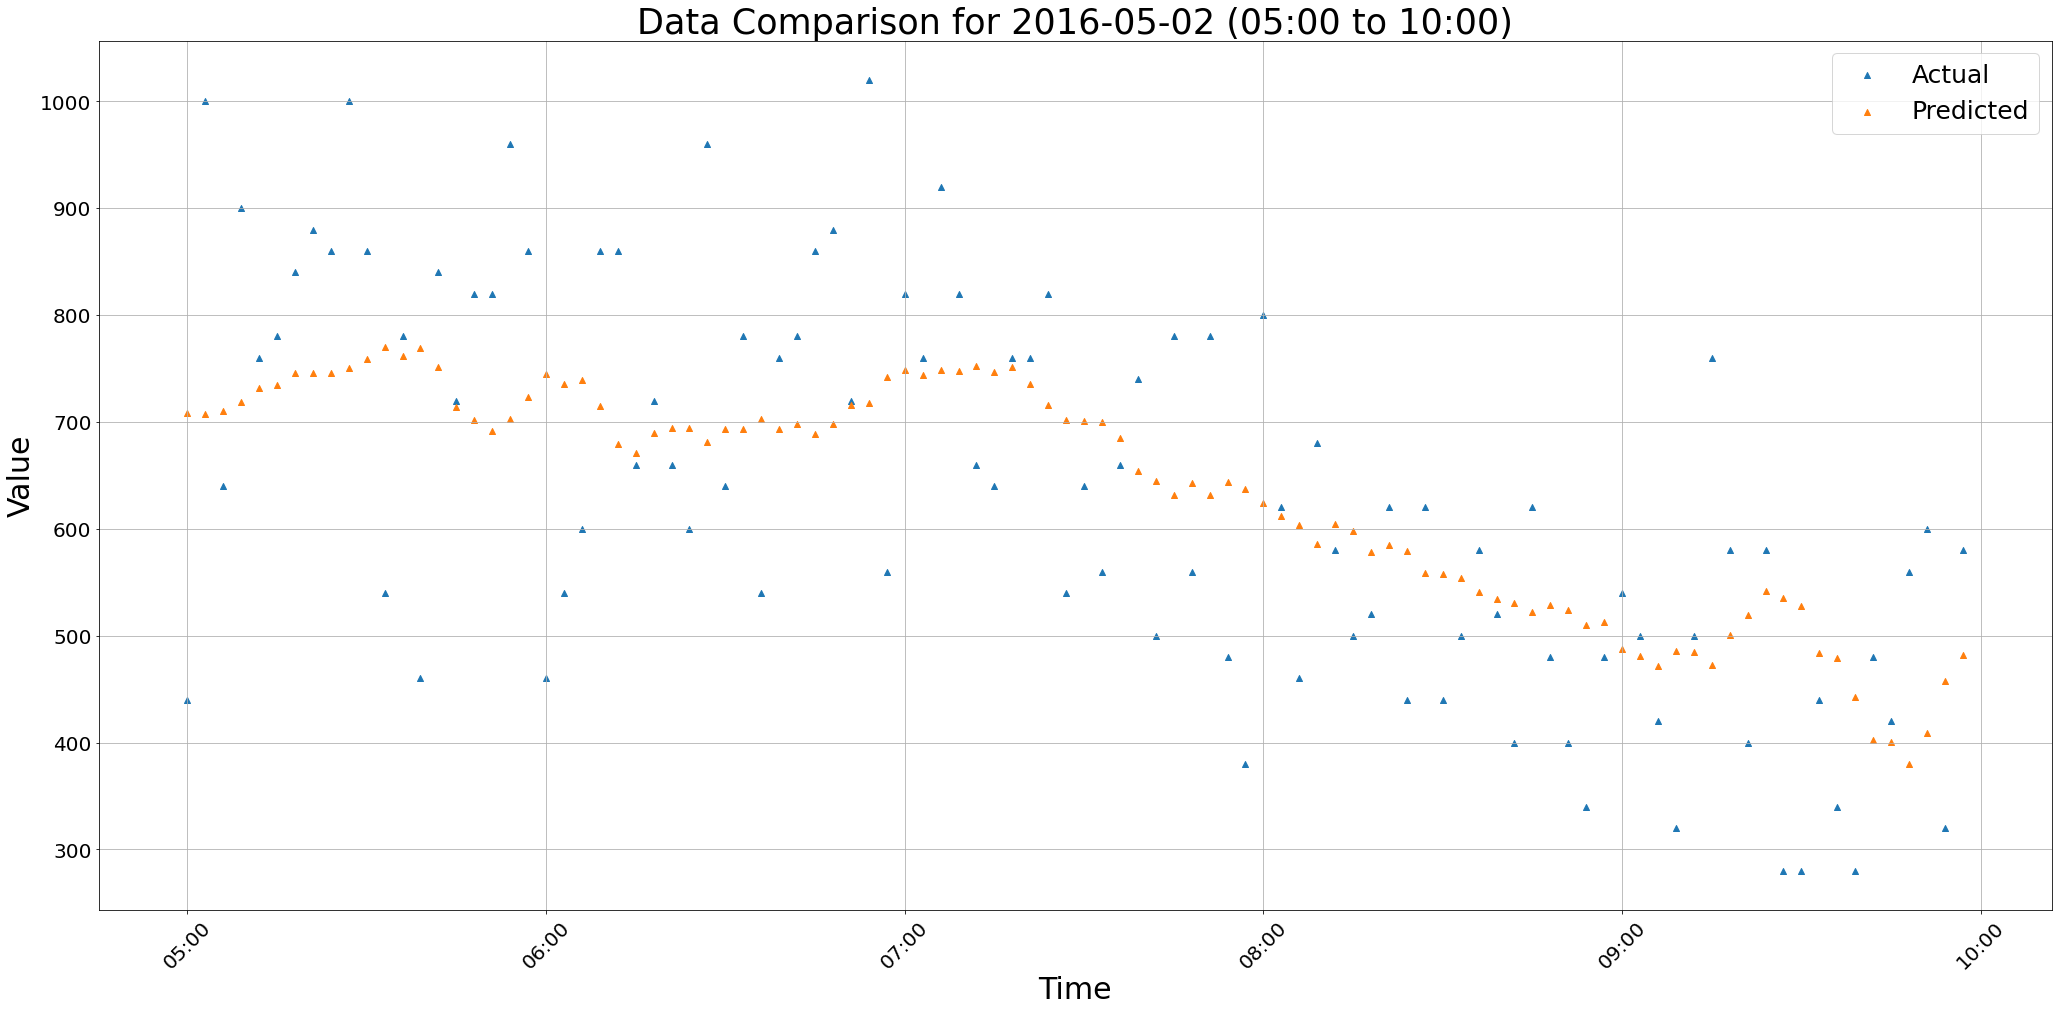

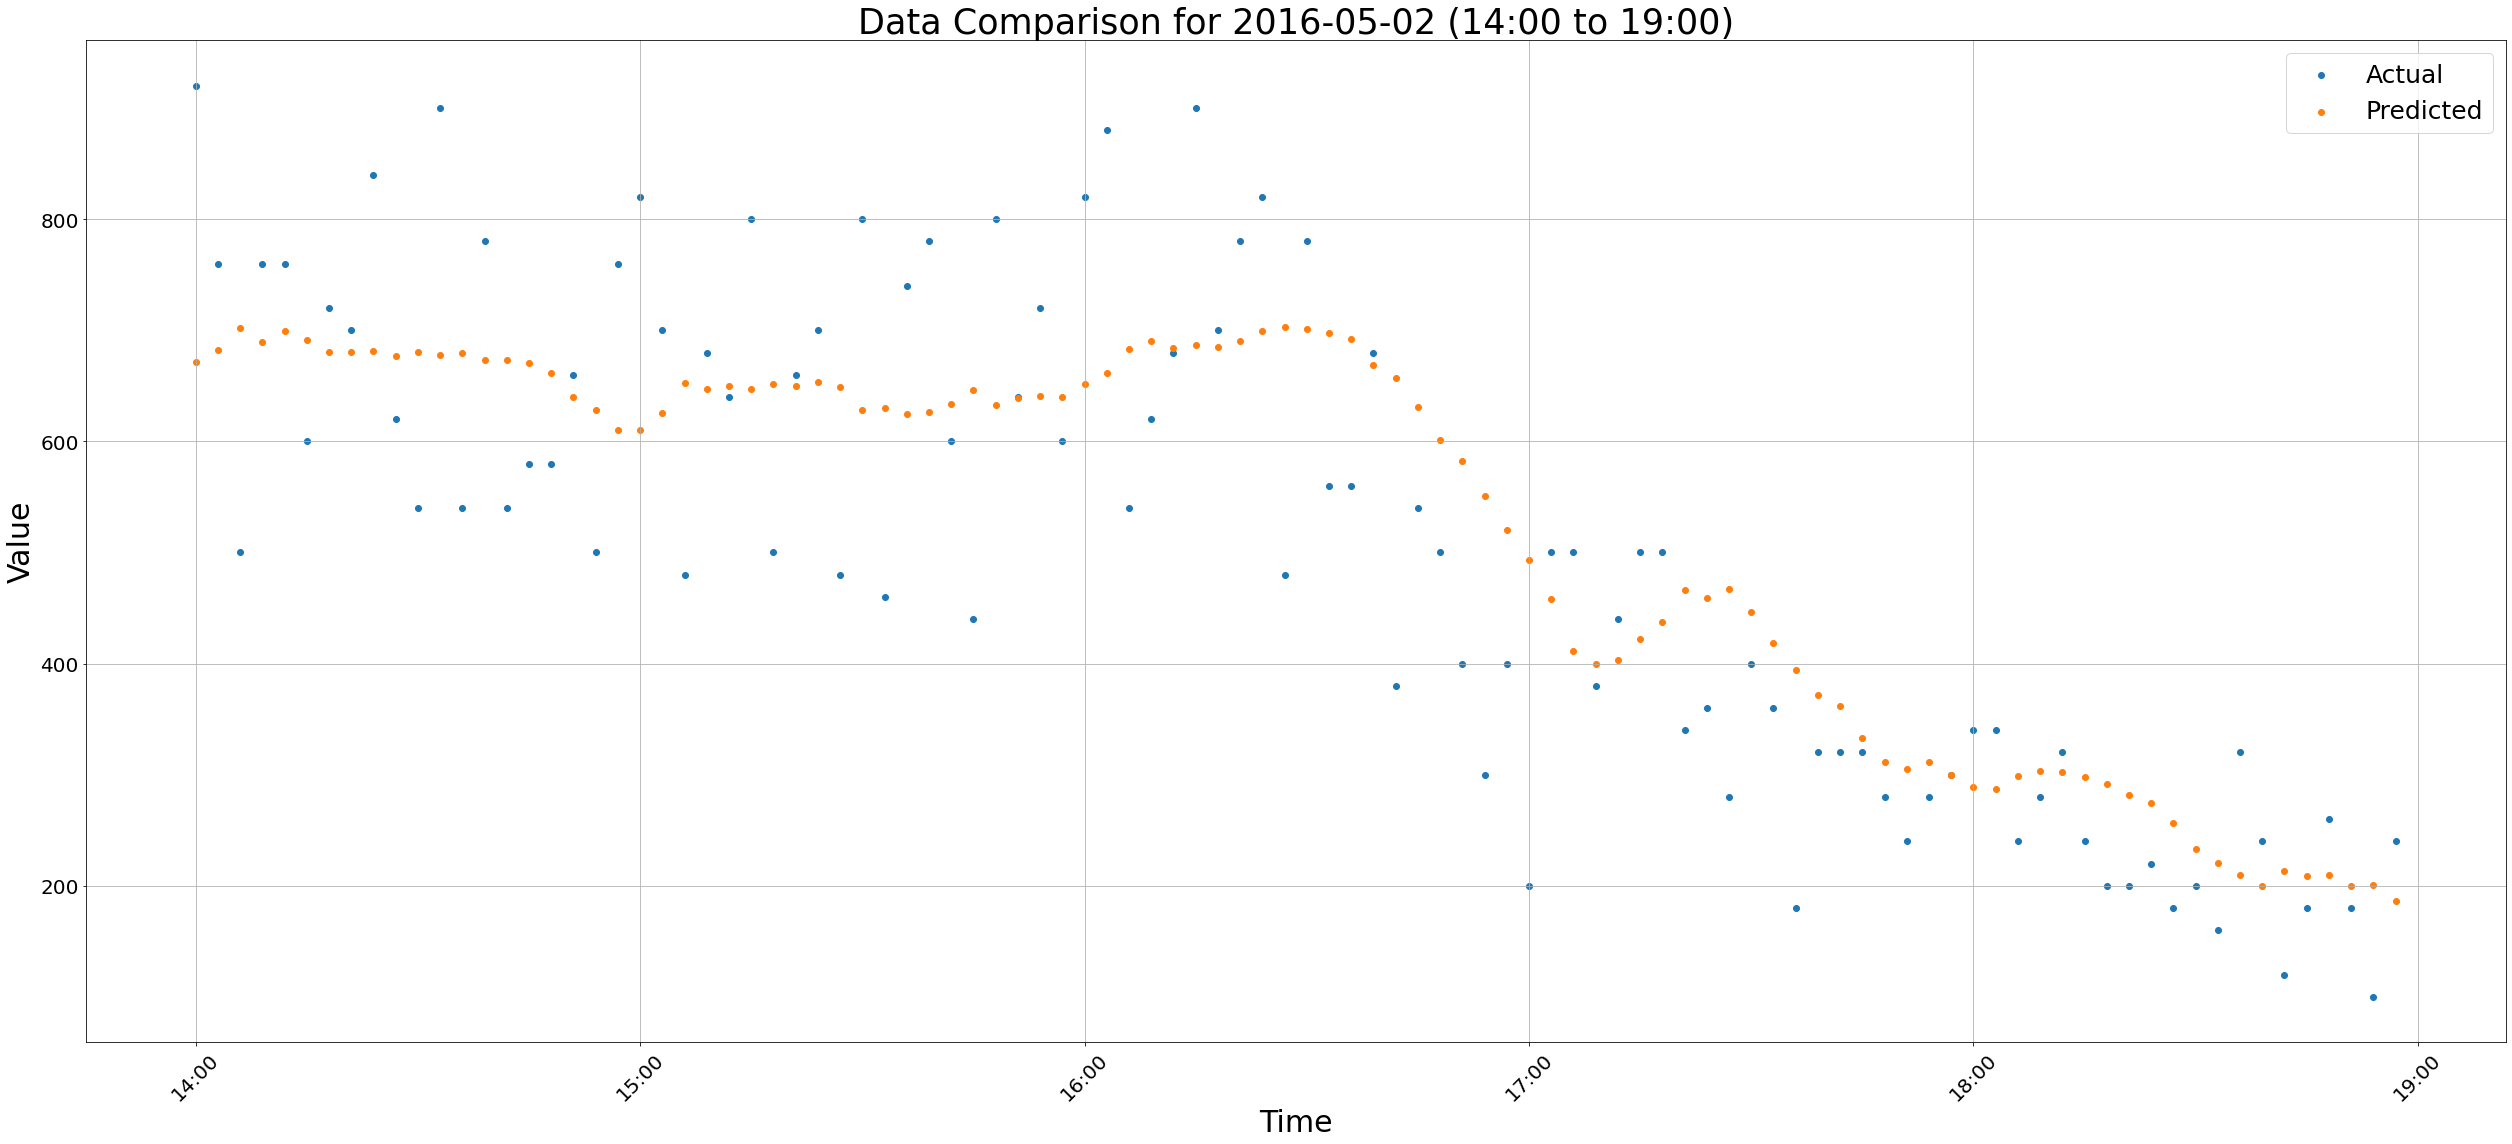

In [24]:
Scatter_data_comparison("CNN_Test_Set_Predictions.csv", "2016-05-02")

In [5]:
import matplotlib.dates as mdates
import os

def plot_data_comparison(file_path, day):
   
    #filepath create
    folder_path = "Graphics/May_2th"  
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)

   # data load
    
    data = pd.read_csv(file_path)
    data['datetime'] = pd.to_datetime(data['datetime'])

    # fillter data by day
    data_filtered = data[data['datetime'].dt.date == pd.to_datetime(day).date()]

    # morning and evening
    data_morning = data_filtered[(data_filtered['datetime'].dt.hour >= 5) & (data_filtered['datetime'].dt.hour < 10)]
    data_evening = data_filtered[(data_filtered['datetime'].dt.hour >= 14) & (data_filtered['datetime'].dt.hour < 19)]

    # entire day comparison
    plt.figure(figsize=(45, 16))
    plt.plot(data_filtered['datetime'], data_filtered['actual'], label='Actual', linewidth=1.5)
    plt.plot(data_filtered['datetime'], data_filtered['predicted'], label='Predicted', linewidth=1.5)
    plt.title(f"Data Comparison for {day} (Entire Day)", fontsize=35)
    plt.xlabel("Time", fontsize=35)  
    plt.ylabel("Value", fontsize=35)  
    plt.legend(fontsize=30)
    plt.xticks(rotation=45, fontsize=25)  
    plt.yticks(fontsize=25)  
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))
    plt.grid(True)  
    plt.tight_layout()
    plt.savefig(os.path.join(folder_path, f'EntireDay_{day}.png'))
    plt.show()
    plt.close()

    # morning plot
    plt.figure(figsize=(45, 16))
    plt.plot(data_morning['datetime'], data_morning['actual'], label='Actual', linewidth=1.5)
    plt.plot(data_morning['datetime'], data_morning['predicted'], label='Predicted', linewidth=1.5)
    plt.title(f"Data Comparison for {day} (05:00 to 10:00)", fontsize=35)
    plt.xlabel("Time", fontsize=35) 
    plt.ylabel("Value", fontsize=35)  
    plt.legend(fontsize=30)
    plt.xticks(rotation=45, fontsize=25)  
    plt.yticks(fontsize=25)  
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))
    plt.grid(True)  
    plt.tight_layout()
    plt.savefig(os.path.join(folder_path, f'Morning_{day}.png'))
    plt.show()
    plt.close()

    # evening plot
    plt.figure(figsize=(45, 16))
    plt.plot(data_evening['datetime'], data_evening['actual'], label='Actual', linewidth=1.5)
    plt.plot(data_evening['datetime'], data_evening['predicted'], label='Predicted', linewidth=1.5)
    plt.title(f"Data Comparison for {day} (14:00 to 19:00)", fontsize=35)
    plt.xlabel("Time", fontsize=35)  
    plt.ylabel("Value", fontsize=35)  
    plt.legend(fontsize=30)
    plt.xticks(rotation=45, fontsize=25)  
    plt.yticks(fontsize=25)  
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))
    plt.grid(True)  # 添加网格线
    plt.tight_layout()
    plt.savefig(os.path.join(folder_path, f'Evening_{day}.png'))
    plt.show()
    plt.close()

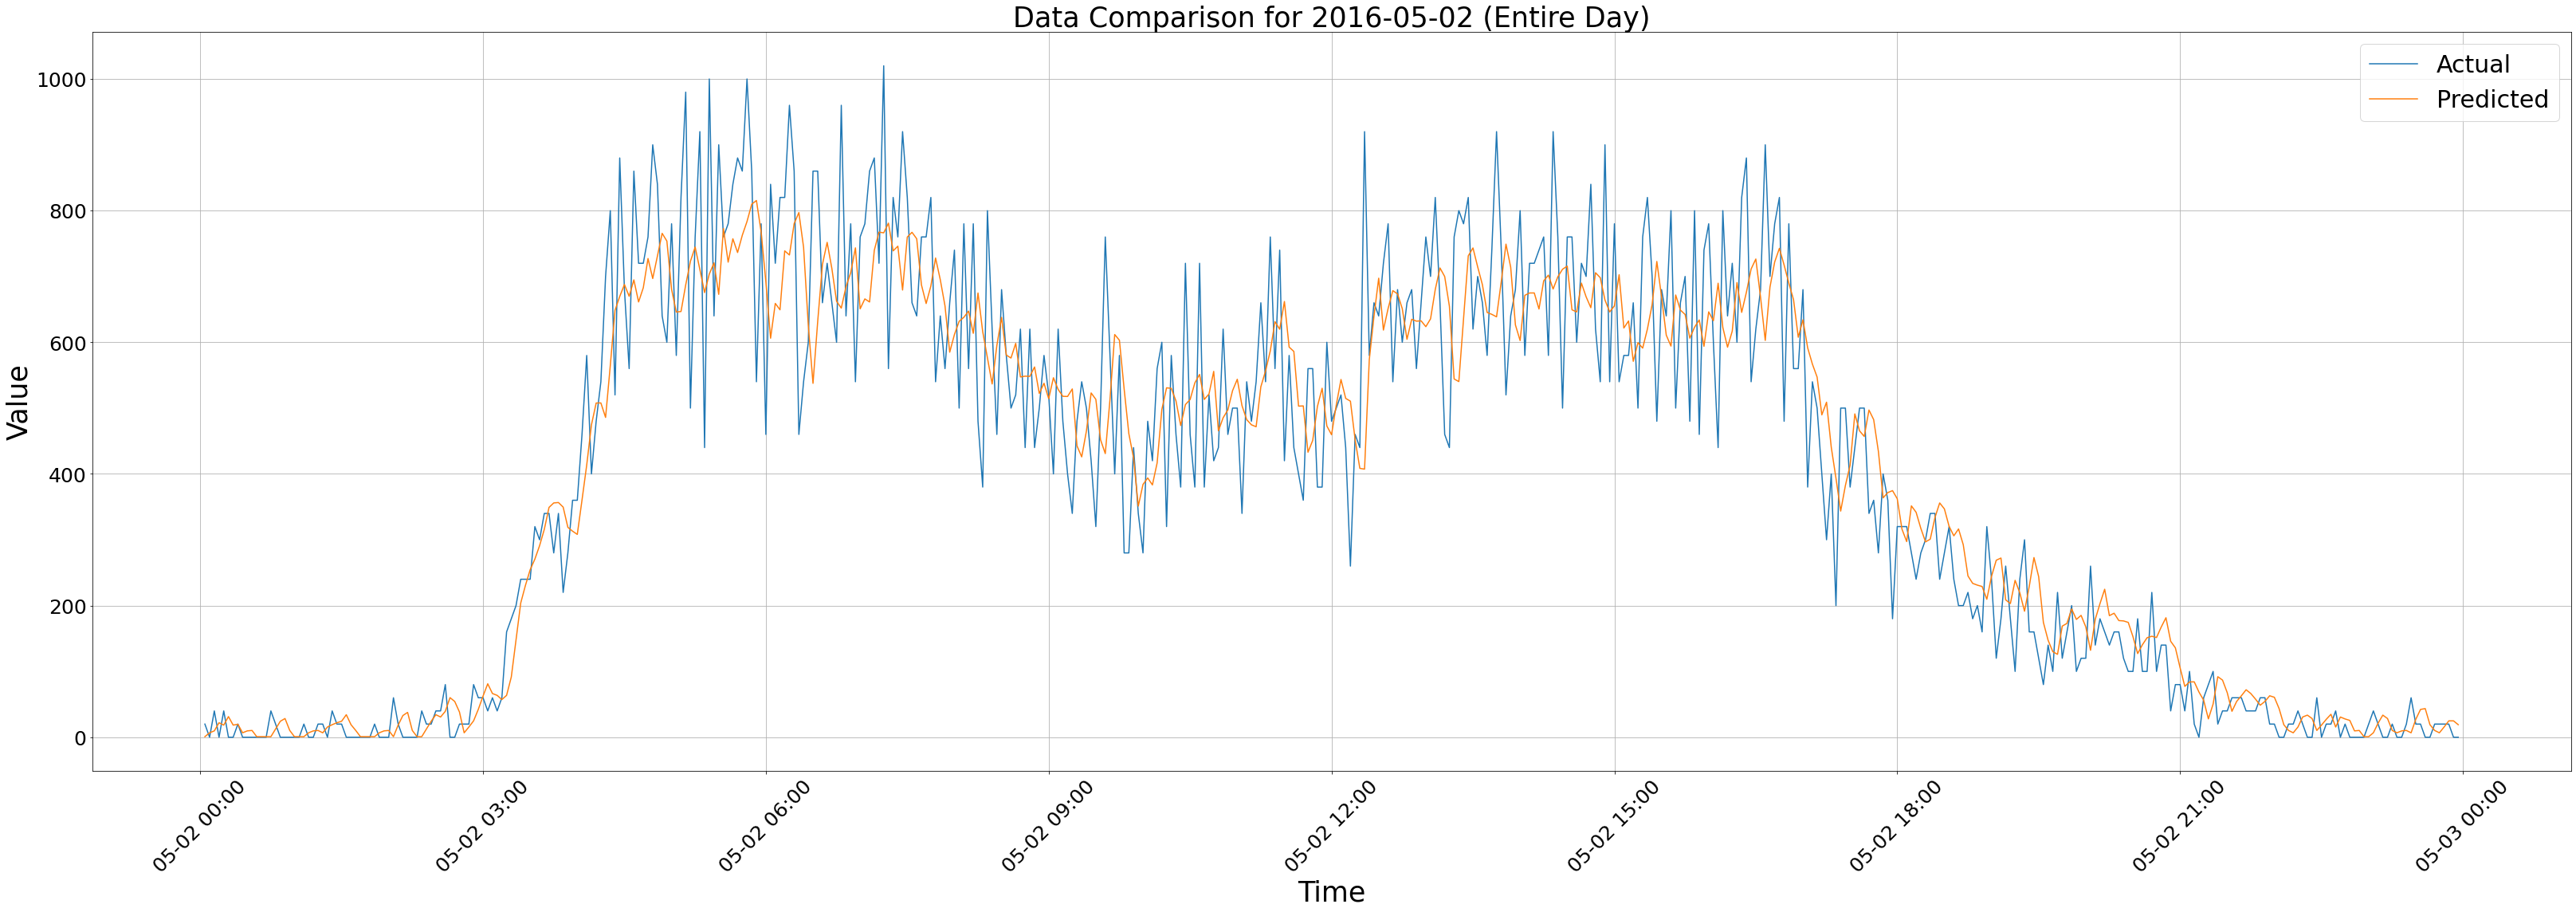

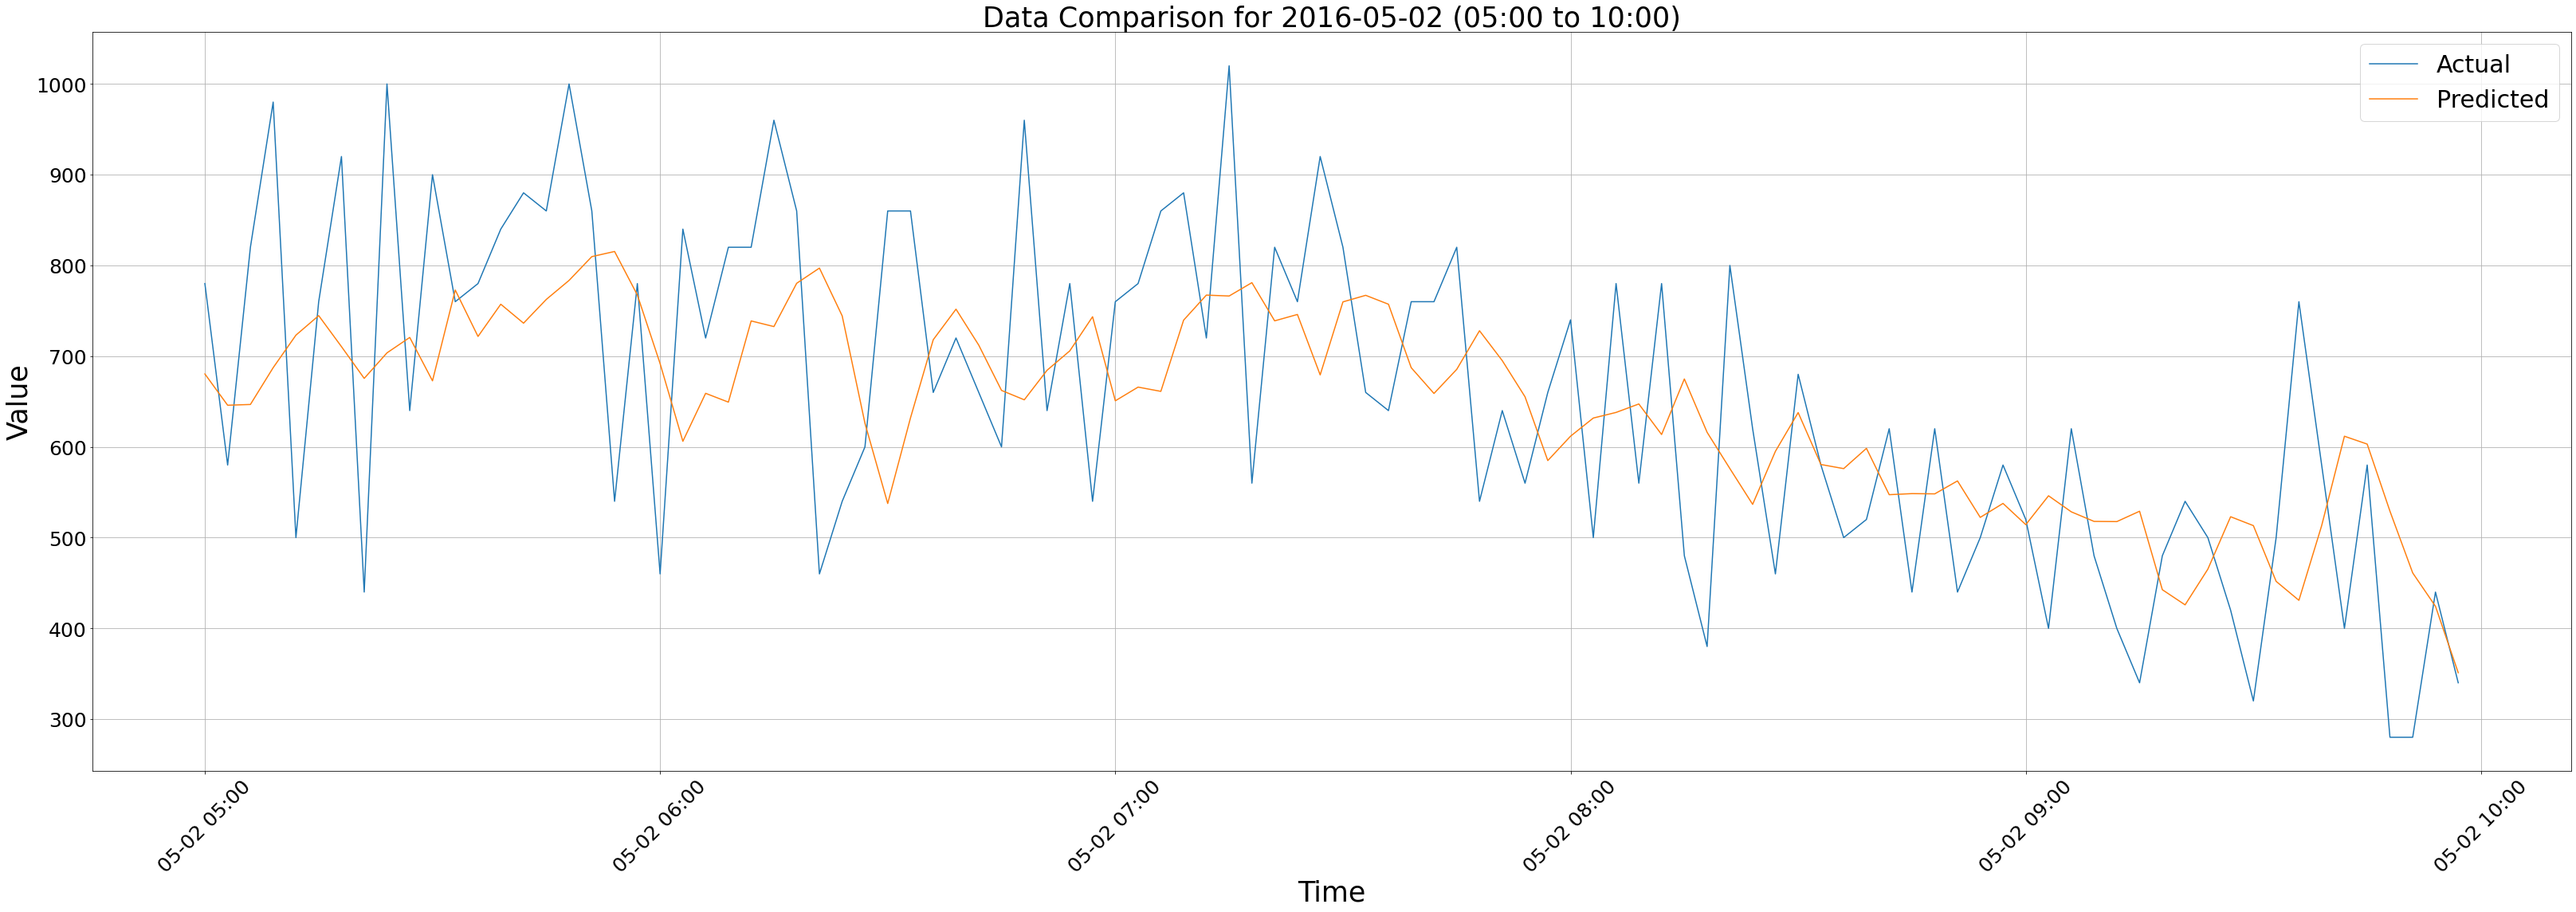

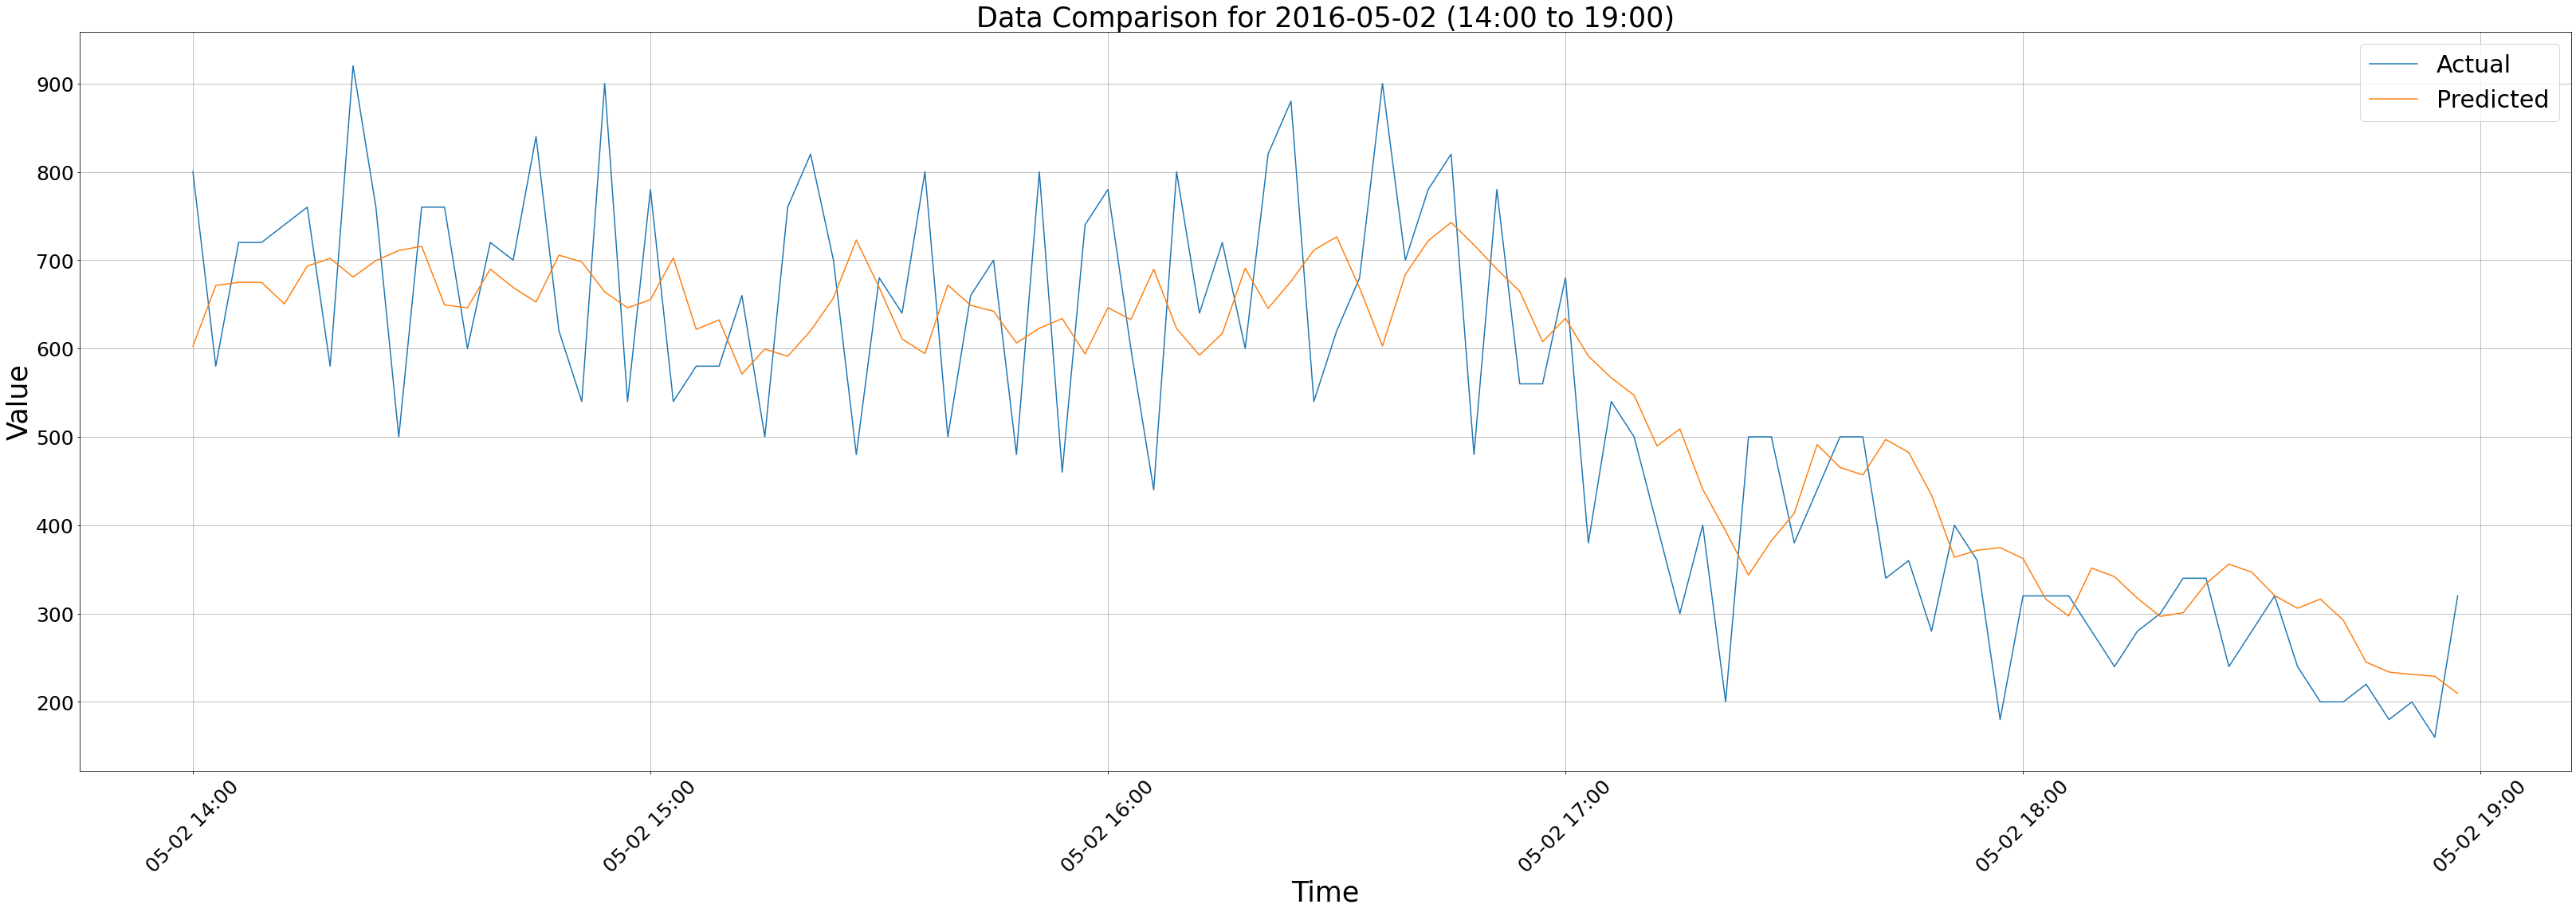

In [6]:
plot_data_comparison("Test_Set_Prediction_data/LSTM_Test_Set_Predictions.csv", "2016-05-02")

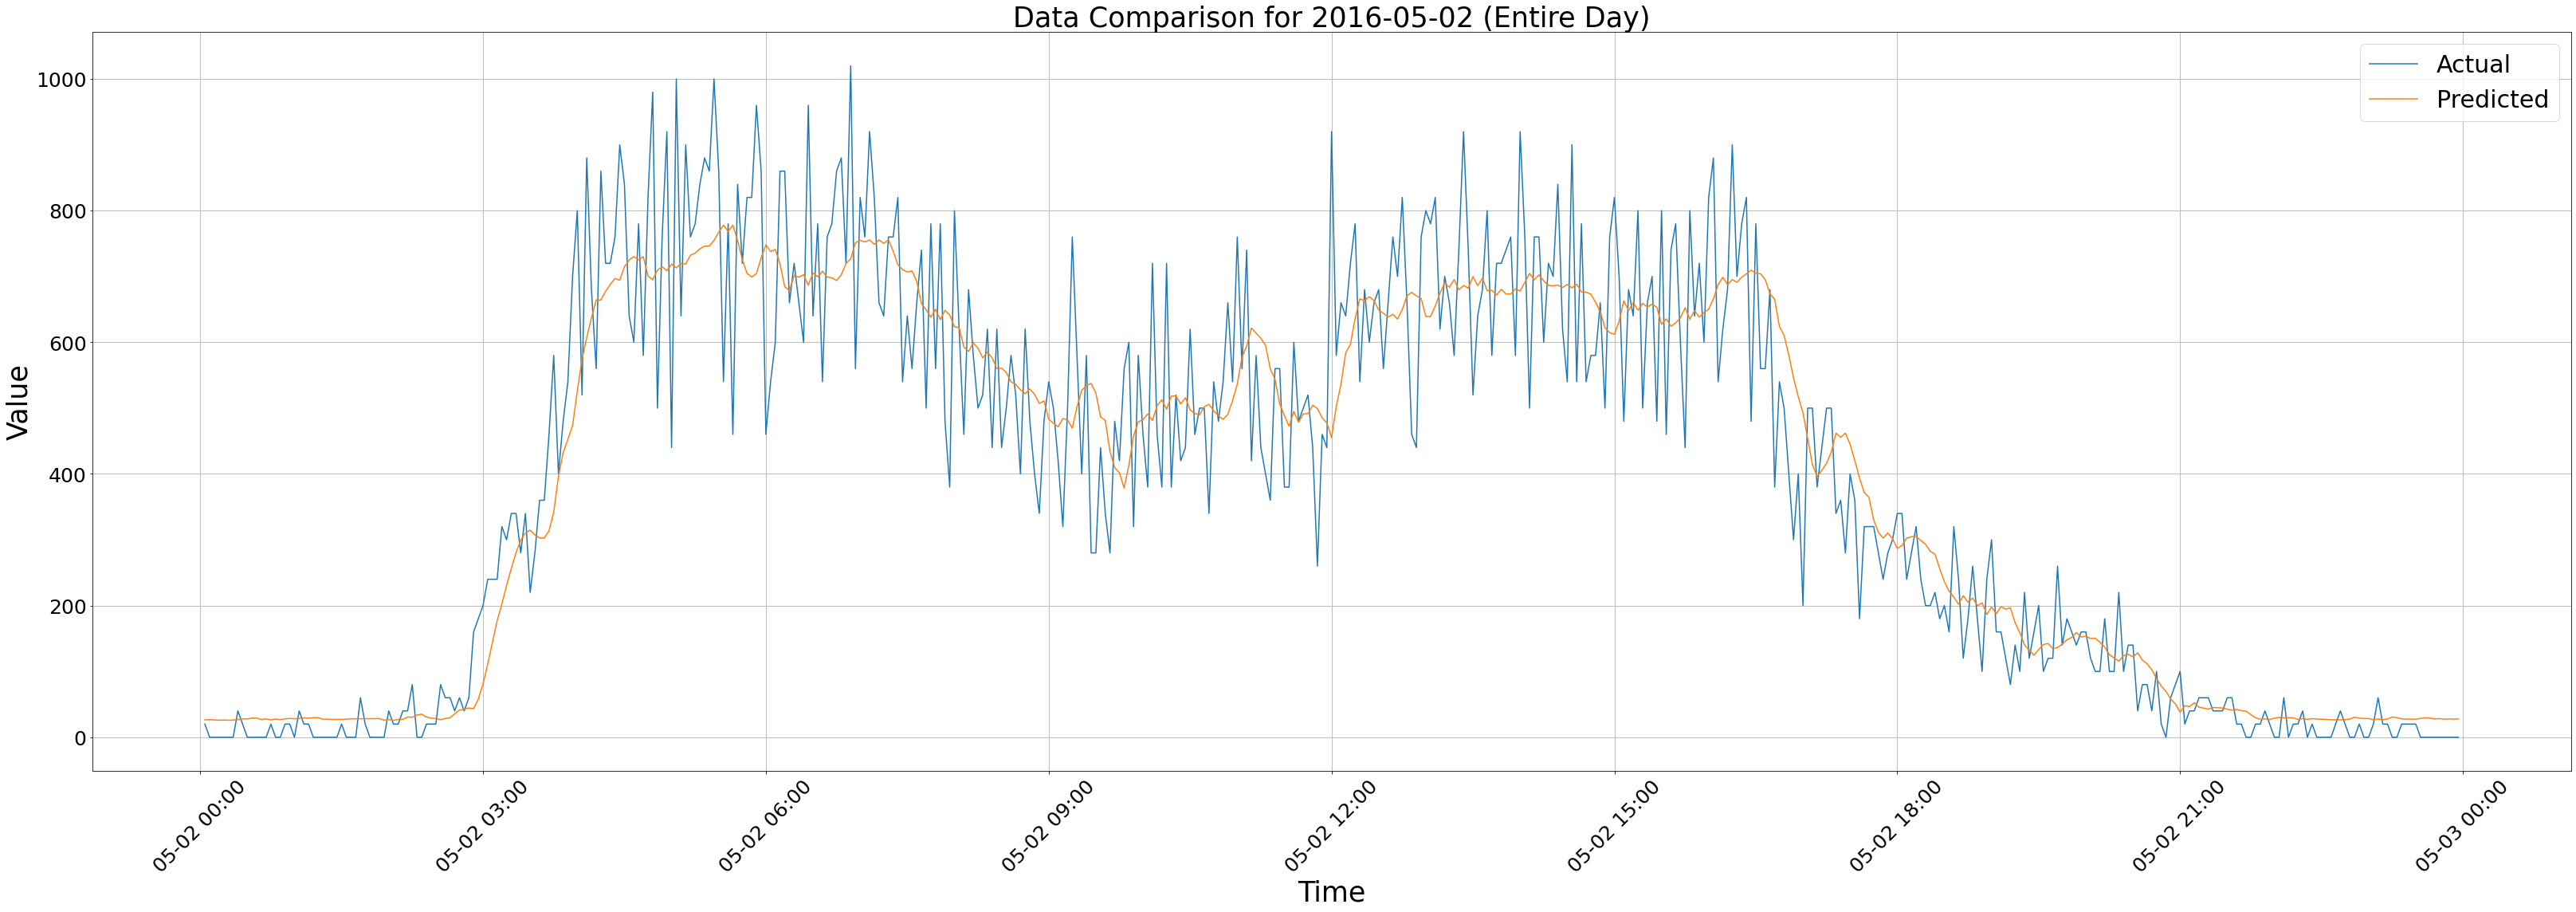

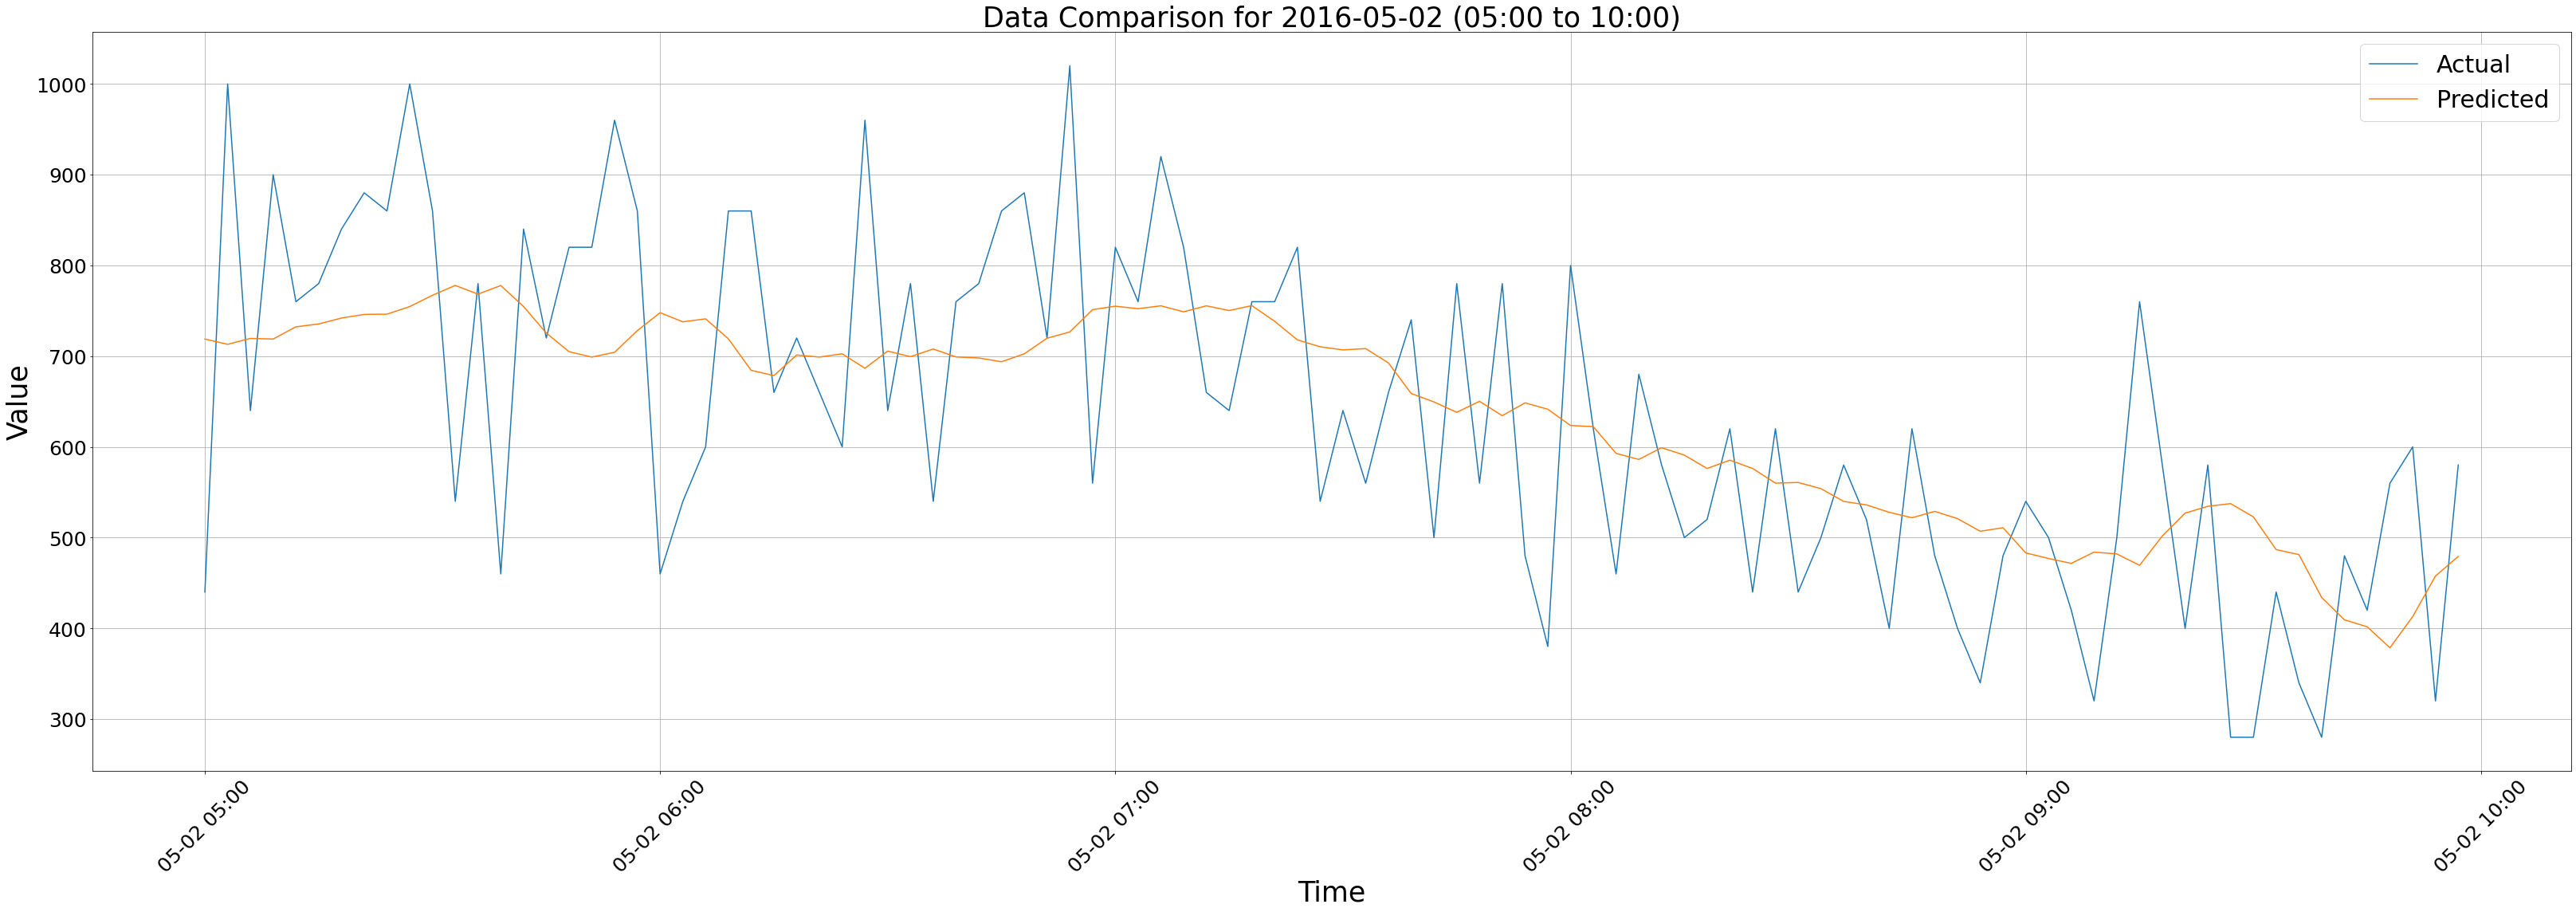

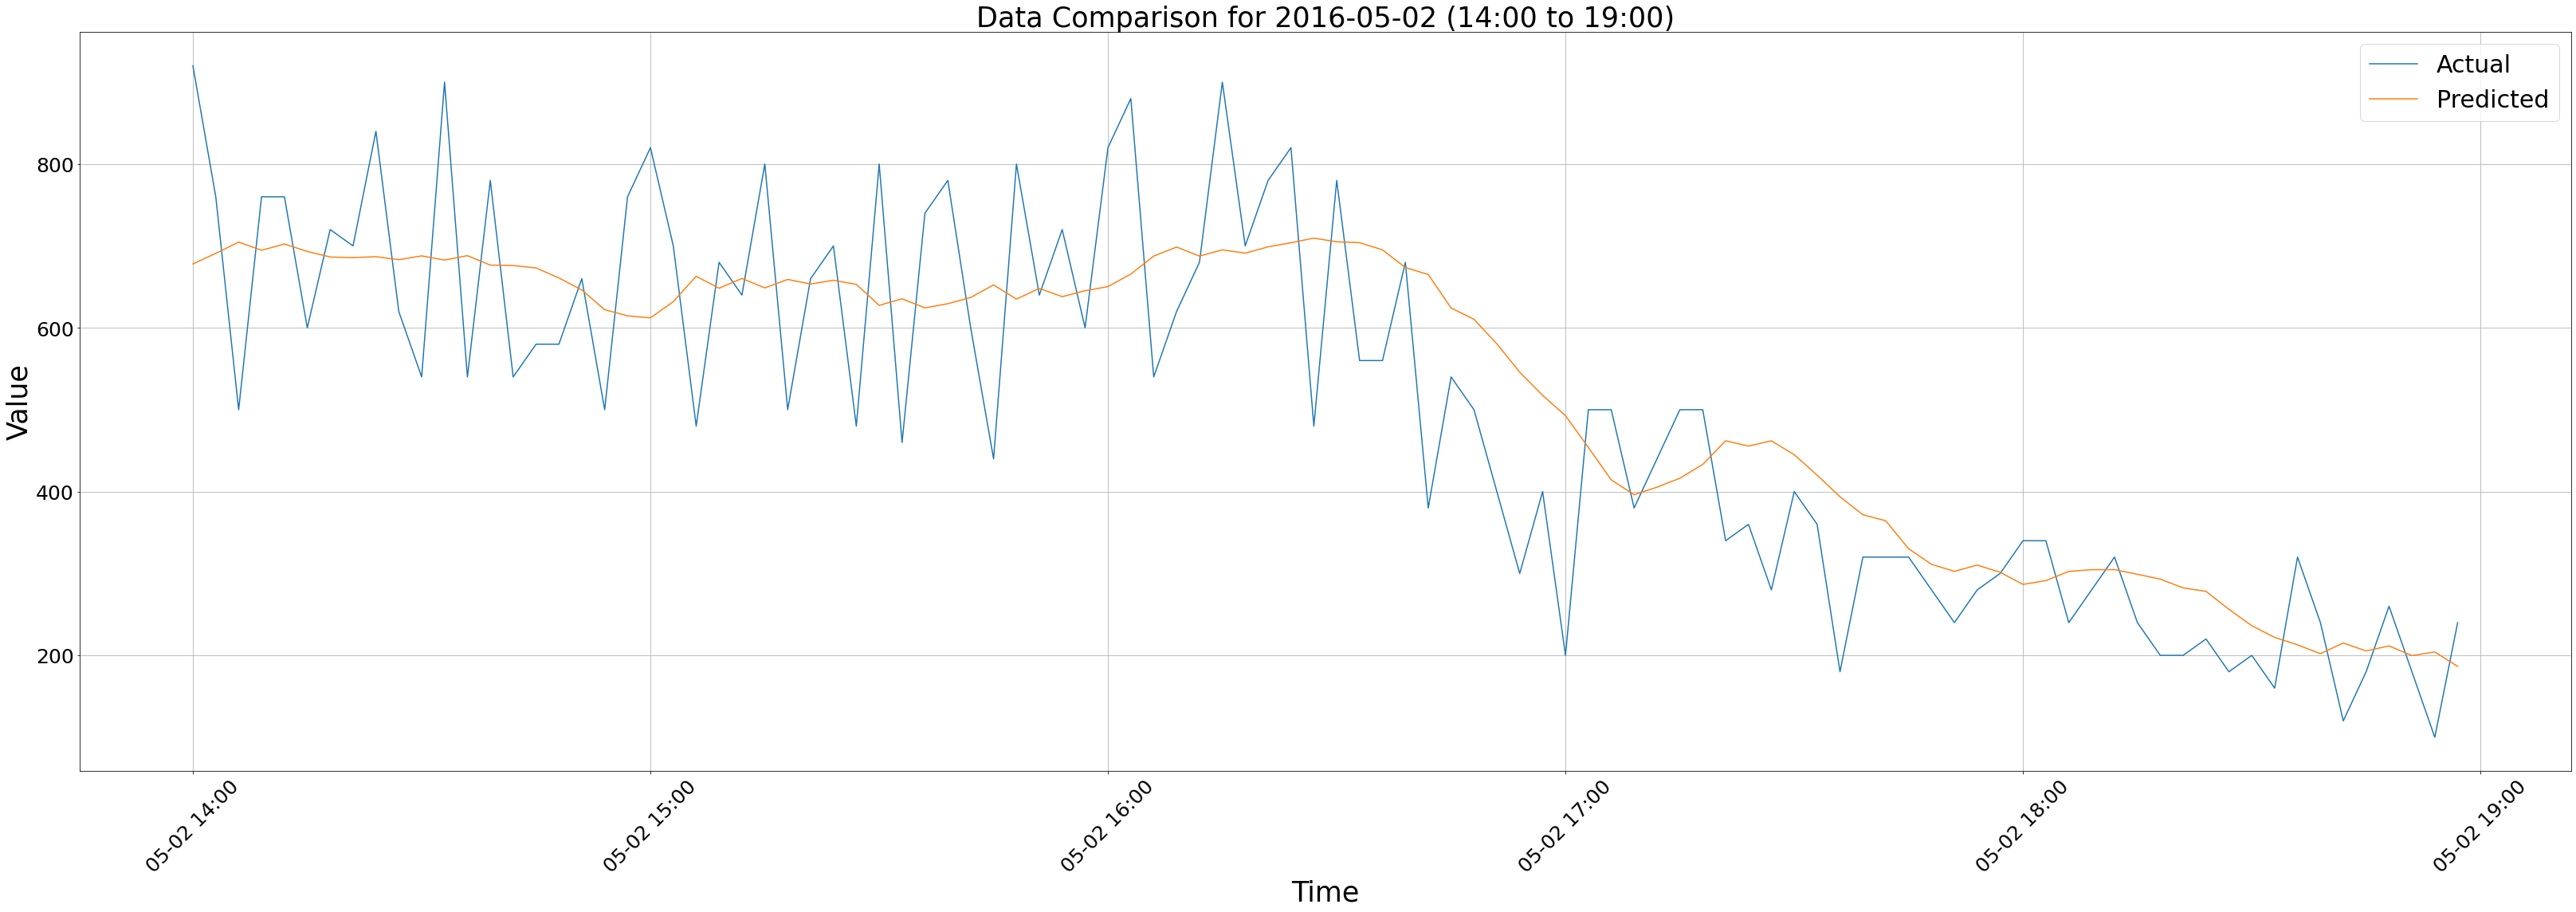

In [8]:
plot_data_comparison("Test_Set_Prediction_data/CNN_Test_Set_Predictions.csv", "2016-05-02")

In [34]:
df1 = pd.read_csv('Test_Set_Prediction_data/LSTM_Test_Set_Predictions.csv')
df2 = pd.read_csv('Test_Set_Prediction_data/CNN_Test_Set_Predictions.csv')
df1['datetime'] = pd.to_datetime(df1['datetime'])
df2['datetime'] = pd.to_datetime(df2['datetime'])

In [35]:
merged_df = pd.merge(df1, df2[['datetime', 'predicted']], on='datetime', suffixes=('_df1', '_df2'))
data_filtered = merged_df[merged_df['datetime'].dt.date == pd.to_datetime("2016-05-02").date()]
data_filtered


,datetime,actual,predicted_df1,predicted_df2
0,2016-05-02 00:03:00,20.0,0.873542,24.355177
1,2016-05-02 00:06:00,0.0,6.768147,23.931892
2,2016-05-02 00:09:00,40.0,9.666220,24.081438
3,2016-05-02 00:12:00,0.0,22.045683,23.573656
4,2016-05-02 00:15:00,40.0,18.429705,23.829731
...,...,...,...,...
474,2016-05-02 23:45:00,20.0,6.768147,24.896900
475,2016-05-02 23:48:00,20.0,15.536589,24.475552
476,2016-05-02 23:51:00,20.0,24.911425,24.613503
477,2016-05-02 23:54:00,0.0,24.911425,24.411638


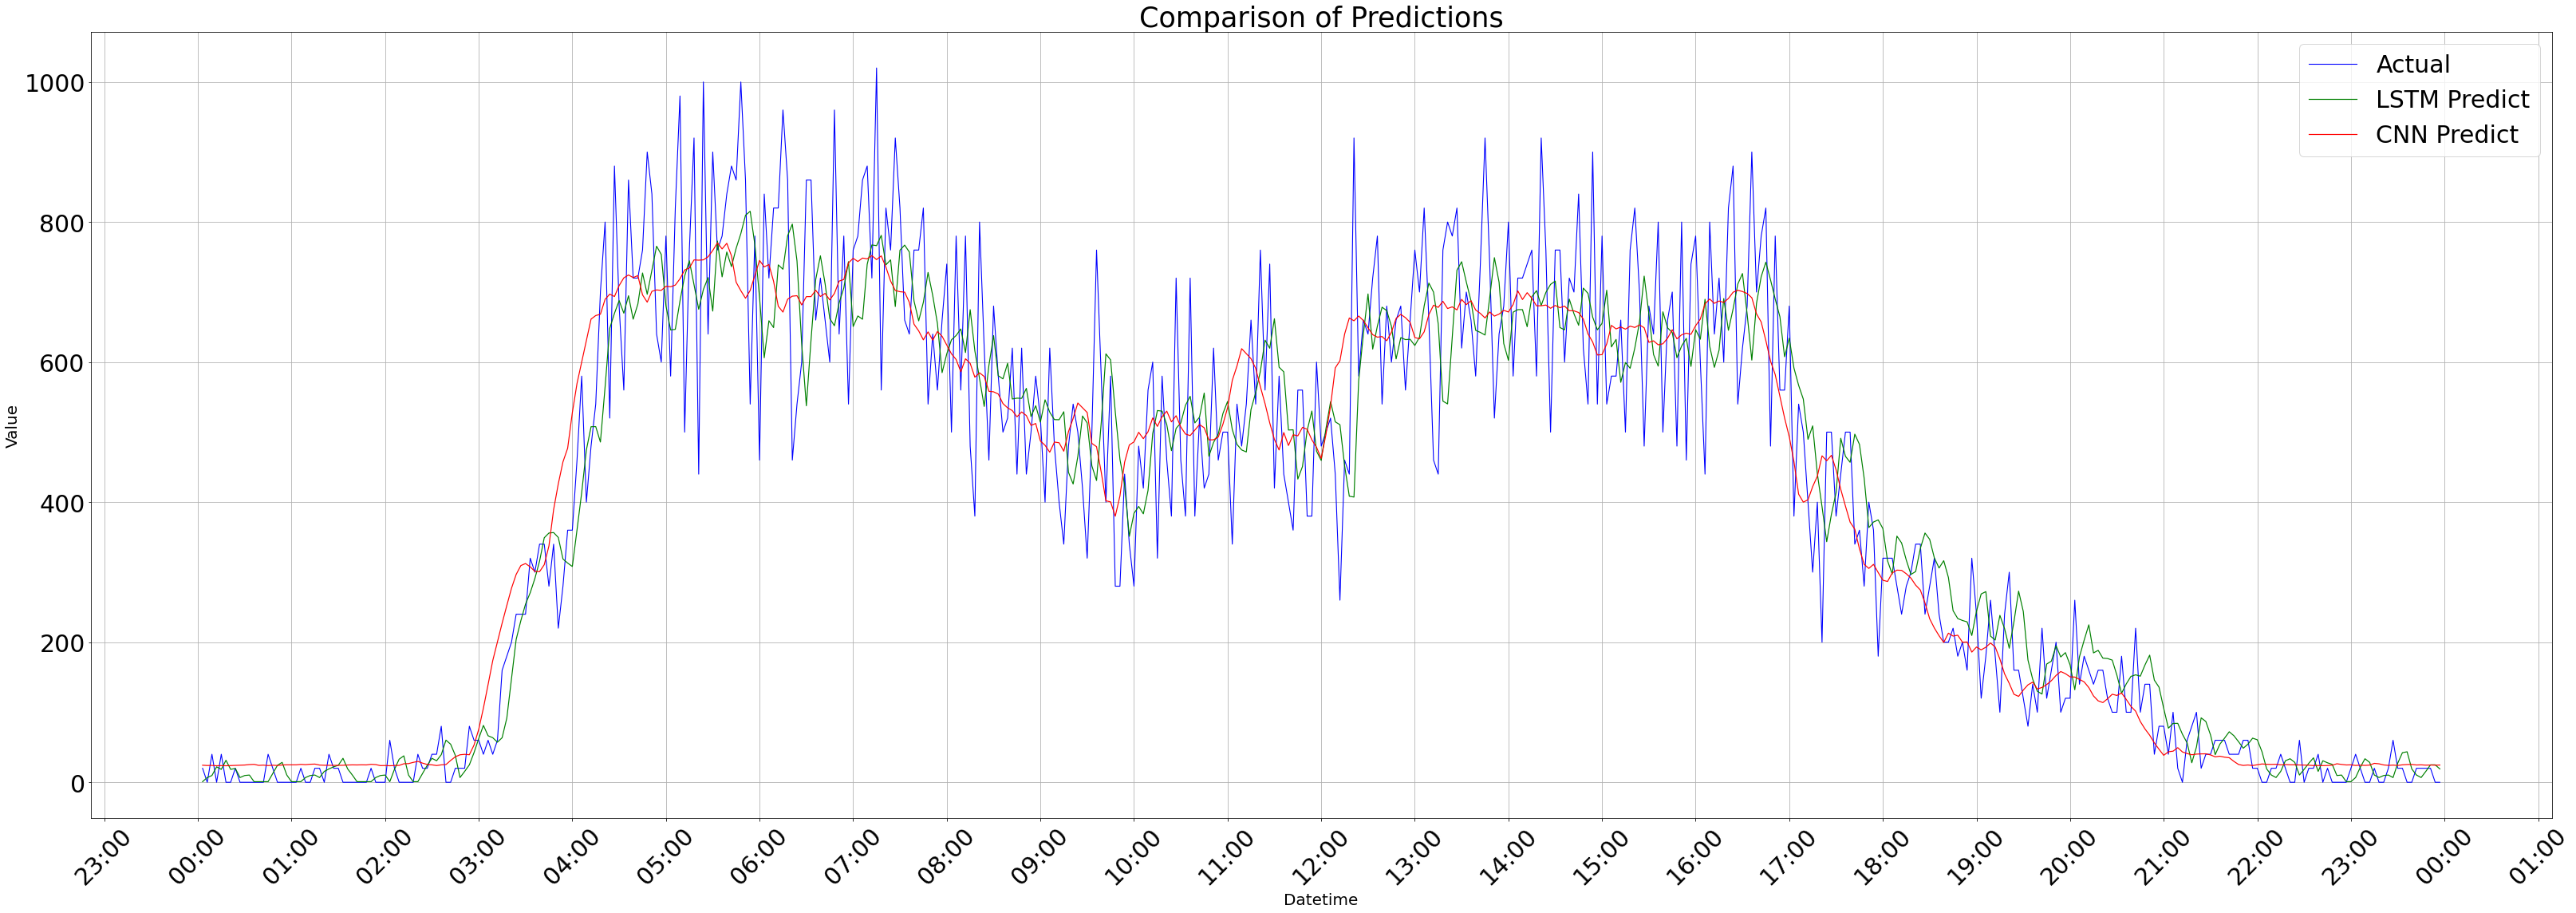

In [37]:
plt.figure(figsize=(45, 16))
# df1--'predicted_df1'，df2--'predicted_df2'（merged）
plt.plot(data_filtered['datetime'], data_filtered['actual'], label='Actual', color='blue', linewidth=1.1)
plt.plot(data_filtered['datetime'], data_filtered['predicted_df1'],  label='LSTM Predict', color='green', linewidth=1.2)
plt.plot(data_filtered['datetime'], data_filtered['predicted_df2'], label='CNN Predict', color='red', linewidth=1.2)

plt.title('Comparison of Predictions', fontsize=35)
plt.xlabel('Datetime', fontsize=20)
plt.ylabel('Value', fontsize=20)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.gca().xaxis.set_major_locator(mdates.HourLocator())

plt.xticks(rotation=45, fontsize=30)  
plt.yticks(fontsize=30) 

plt.legend(fontsize=30)

plt.grid(True)

plt.tight_layout()
#folder_path = "../Graphics/May_2th" 
#plt.savefig(os.path.join(folder_path, 'Comparison_Of_Prediction_24H'))
plt.show()